In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [6]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.conv1 = nn.Conv2d(1,20,5)
    self.conv2 = nn.Conv2d(20, 50, 5)
    self.fc1 = nn.Linear(4*4*50, 500)
    self.fc2 = nn.Linear(500, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 4*4*50)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x, dim=1)


In [7]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data',train=True, download=True,
                   transform=transforms.Compose([
                      transforms.ToTensor(),
                      transforms.Normalize((0.1307,),(0.308,))
                   ])),
    batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])),
    batch_size=1000, shuffle=True)

In [8]:
def train(model, device, train_loader, optimizer, epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 100 == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss:{:.6f}'.format(
          epoch, batch_idx * len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += F.nll_loss(output, target, reduction='sum').item()
      pred = output.argmax(dim=1,keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Average loss: {:.4f}, Accuracy:{}/{} ({:.0f}%)\n'.format(
      test_loss, correct, len(test_loader.dataset),
      100.* correct / len(test_loader.dataset)))

In [9]:
use_cuda = torch.cuda.is_available()
torch.manual_seed(42)
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.5)
test(model, device, test_loader)
for epoch in range(1, 3 + 1):
  train(model, device, train_loader, optimizer, epoch)
  test(model, device, test_loader)

torch.save(model.state_dict(),"mnist.pt")


Test set: Average loss: 2.3073, Accuracy:828/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss:2.319893
Train Epoch: 1 [12800/60000 (21%)]	Loss:0.264783
Train Epoch: 1 [25600/60000 (43%)]	Loss:0.087922
Train Epoch: 1 [38400/60000 (64%)]	Loss:0.059086
Train Epoch: 1 [51200/60000 (85%)]	Loss:0.068210

Test set: Average loss: 0.0624, Accuracy:9808/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss:0.094819
Train Epoch: 2 [12800/60000 (21%)]	Loss:0.063916
Train Epoch: 2 [25600/60000 (43%)]	Loss:0.076111
Train Epoch: 2 [38400/60000 (64%)]	Loss:0.049620
Train Epoch: 2 [51200/60000 (85%)]	Loss:0.011778

Test set: Average loss: 0.0433, Accuracy:9867/10000 (99%)

Train Epoch: 3 [0/60000 (0%)]	Loss:0.038653
Train Epoch: 3 [12800/60000 (21%)]	Loss:0.039594
Train Epoch: 3 [25600/60000 (43%)]	Loss:0.054793
Train Epoch: 3 [38400/60000 (64%)]	Loss:0.013502
Train Epoch: 3 [51200/60000 (85%)]	Loss:0.064498

Test set: Average loss: 0.0402, Accuracy:9862/10000 (99%)



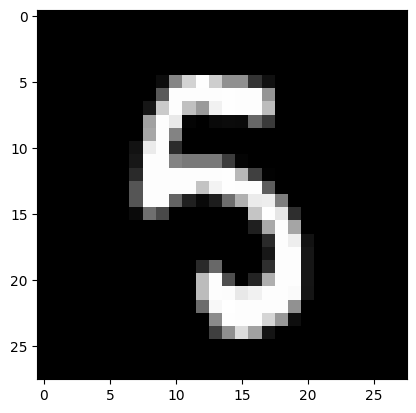

In [10]:
import matplotlib.pyplot as plt
test_image = test_loader.dataset.data[1334]
plt.imshow(test_image, cmap='gray')

In [12]:
#especify in .view batch size, 1 image, 1 communication channel black and white instead of the rgb for a color image, size 28 by 28
out = model(test_image.view(1,1,28,28).float().cuda())
out

tensor([[-1374.2246, -1554.3940, -1337.0198,  -951.4623, -1563.0730,     0.0000,
         -1164.4679, -1176.2316,  -530.9907,  -767.6432]], device='cuda:0',
       grad_fn=<LogSoftmaxBackward0>)

In [13]:
out.argmax(dim=1)

tensor([5], device='cuda:0')

In [14]:
import torchvision
dir(torchvision.models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'